In [1]:
import pandas as pd
df=pd.read_csv("train.csv")
df_oil=pd.read_csv("oil.csv")
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [2]:
len(df["family"].value_counts())

33

<Axes: >

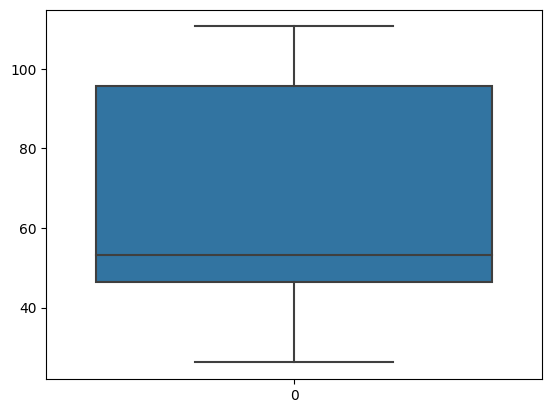

In [3]:
import seaborn as sns
sns.boxplot(df_oil['dcoilwtico'])

In [4]:
def oil(df,df_oil):
    df_oil.fillna(df_oil['dcoilwtico'].mean(),inplace=True)
    merged_df = pd.merge(df, df_oil, on="date", how="left")
    merged_df.fillna(merged_df['dcoilwtico'].mean(),inplace=True)
    return merged_df

In [5]:
df=oil(df,df_oil)
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000


In [6]:
df_stores=pd.read_csv("stores.csv")
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
# Merge the specified columns based on the "date" column
merged_df = df.merge(df_stores, on='store_nbr', how='inner')
merged_df=merged_df.drop(columns=(['type']))
merged_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,Pichincha,13
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,Pichincha,13
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,Pichincha,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,Pichincha,13
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,Pichincha,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,Pichincha,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,Pichincha,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,Pichincha,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,Pichincha,6


In [8]:
df_holidays_events=pd.read_csv("holidays_events.csv")
df_holidays_events["date"] = pd.to_datetime(df_holidays_events["date"], format="%m/%d/%Y")
df_holidays_events 

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
df_holidays_events['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [10]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert the 'date' column in df_holidays_events to datetime64[ns]
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])


df = merged_df.merge(df_holidays_events, on='date', how='left')


In [11]:
import pandas as pd


# Convert the 'timestamp' column to datetime64[ns]
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [12]:
df=pd.DataFrame(df)
x=df.drop(columns=(["date","description","sales",'locale_name','id','state','locale']))
y=df['sales']
x

,store_nbr,family,onpromotion,dcoilwtico,city,cluster,type,transferred,year,month,day
0,1,AUTOMOTIVE,0,67.714366,Quito,13,Holiday,False,2013,1,1
1,1,BABY CARE,0,67.714366,Quito,13,Holiday,False,2013,1,1
2,1,BEAUTY,0,67.714366,Quito,13,Holiday,False,2013,1,1
3,1,BEVERAGES,0,67.714366,Quito,13,Holiday,False,2013,1,1
4,1,BOOKS,0,67.714366,Quito,13,Holiday,False,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3054343,9,POULTRY,0,47.570000,Quito,6,Holiday,False,2017,8,15
3054344,9,PREPARED FOODS,1,47.570000,Quito,6,Holiday,False,2017,8,15
3054345,9,PRODUCE,148,47.570000,Quito,6,Holiday,False,2017,8,15
3054346,9,SCHOOL AND OFFICE SUPPLIES,8,47.570000,Quito,6,Holiday,False,2017,8,15


In [13]:
x["type"].value_counts()

type
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

In [14]:
df1 =df[(df['type']=='Additional')]
df1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,cluster,type,locale,locale_name,description,transferred,year,month,day
4290,231660,2013-05-11,1,AUTOMOTIVE,4.000,0,67.918566,Quito,Pichincha,13,Additional,National,Ecuador,Dia de la Madre-1,False,2013,5,11
4291,231661,2013-05-11,1,BABY CARE,0.000,0,67.918566,Quito,Pichincha,13,Additional,National,Ecuador,Dia de la Madre-1,False,2013,5,11
4292,231662,2013-05-11,1,BEAUTY,4.000,0,67.918566,Quito,Pichincha,13,Additional,National,Ecuador,Dia de la Madre-1,False,2013,5,11
4293,231663,2013-05-11,1,BEVERAGES,1114.000,0,67.918566,Quito,Pichincha,13,Additional,National,Ecuador,Dia de la Madre-1,False,2013,5,11
4294,231664,2013-05-11,1,BOOKS,0.000,0,67.918566,Quito,Pichincha,13,Additional,National,Ecuador,Dia de la Madre-1,False,2013,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053650,2963461,2017-07-25,9,POULTRY,320.009,0,47.770000,Quito,Pichincha,6,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,2017,7,25
3053651,2963462,2017-07-25,9,PREPARED FOODS,51.879,0,47.770000,Quito,Pichincha,6,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,2017,7,25
3053652,2963463,2017-07-25,9,PRODUCE,2100.046,152,47.770000,Quito,Pichincha,6,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,2017,7,25
3053653,2963464,2017-07-25,9,SCHOOL AND OFFICE SUPPLIES,5.000,0,47.770000,Quito,Pichincha,6,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,2017,7,25


In [15]:
a = df1.groupby(['date','sales'])
a

In [16]:
df1["sales"].value_counts()

sales
0.000       18413
1.000        2449
2.000        1883
3.000        1427
4.000        1228
            ...  
3478.812        1
118.966         1
222.723         1
108.151         1
17.378          1
Name: count, Length: 15823, dtype: int64

In [17]:
x.isnull().sum()

store_nbr            0
family               0
onpromotion          0
dcoilwtico           0
city                 0
cluster              0
type           2551824
transferred    2551824
year                 0
month                0
day                  0
dtype: int64

In [18]:
x['type'].fillna('Work Day',inplace=True)
x['transferred'].fillna(False,inplace=True)


<Axes: >

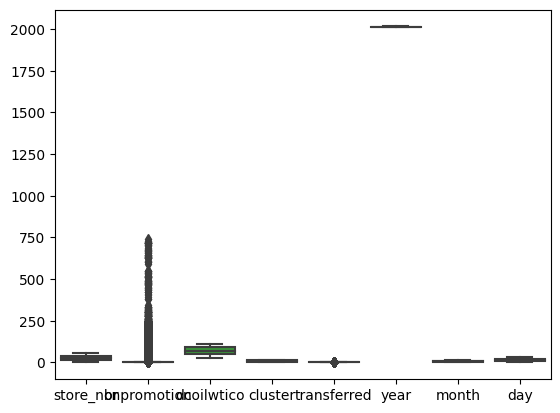

In [19]:
sns.boxplot(x)

In [20]:
df[(df['date']=='2017-12-22')]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,cluster,type,locale,locale_name,description,transferred,year,month,day


In [21]:
df1['sales'].value_counts()

sales
0.000       18413
1.000        2449
2.000        1883
3.000        1427
4.000        1228
            ...  
3478.812        1
118.966         1
222.723         1
108.151         1
17.378          1
Name: count, Length: 15823, dtype: int64

In [22]:
# Debugging: Check for common dates in both datasets
common_dates = set(df_holidays_events["date"]).intersection(df_holidays_events["date"])
print("Common Dates:", len(common_dates))


Common Dates: 312


In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   onpromotion  int64  
 3   dcoilwtico   float64
 4   city         object 
 5   cluster      int64  
 6   type         object 
 7   transferred  bool   
 8   year         int32  
 9   month        int32  
 10  day          int32  
dtypes: bool(1), float64(1), int32(3), int64(3), object(3)
memory usage: 201.0+ MB


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer([
    ('tnf1',OneHotEncoder(sparse=False,dtype=int),['city']),
    ('tnf2',OneHotEncoder(sparse=False,dtype=int),['type']),
    ('tnf3',OneHotEncoder(sparse=False,dtype=int),['transferred']),
    ('tnf4',OneHotEncoder(sparse=False,dtype=int),['family'])

],remainder='passthrough')


In [25]:
X_transformed = transformer.fit_transform(x)
X_transformed=pd.DataFrame(X_transformed)
X_transformed.info()

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_enc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 70 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [26]:
import joblib

# Save the transformer to a file
joblib.dump(transformer, 'preprocessing_transformer.pkl')

['preprocessing_transformer.pkl']

In [27]:
X_transformed

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.714366,13.0,2013.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.714366,13.0,2013.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.714366,13.0,2013.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.714366,13.0,2013.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.714366,13.0,2013.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,47.570000,6.0,2017.0,8.0,15.0
3054344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,1.0,47.570000,6.0,2017.0,8.0,15.0
3054345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,9.0,148.0,47.570000,6.0,2017.0,8.0,15.0
3054346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.0,8.0,47.570000,6.0,2017.0,8.0,15.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2748913 entries, 844781 to 1461501
Data columns (total 70 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
pre_d=r2_score(y_test , y_pred)
print(pre_d)


0.9344308896966521


In [31]:
joblib.dump(model, 'model.pkl')

['model.pkl']